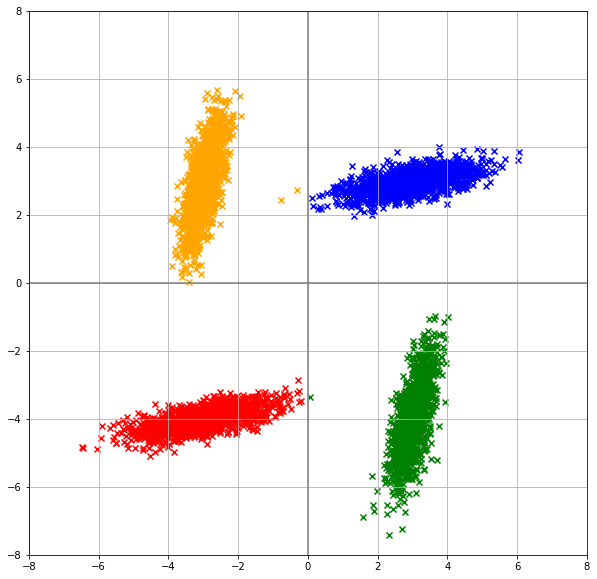

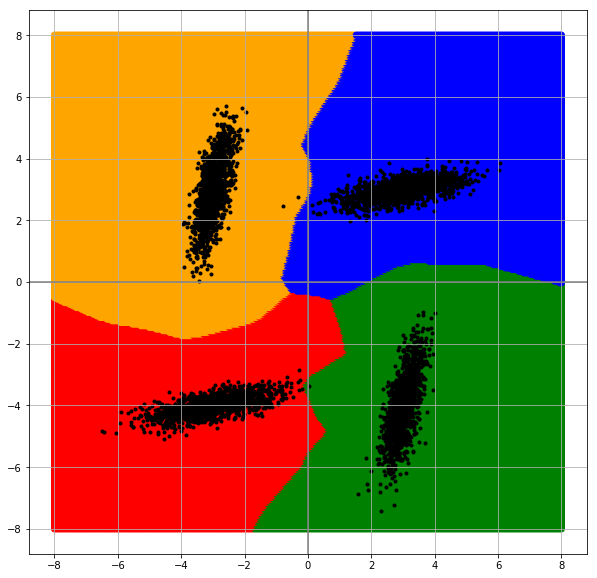

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors

plt.rcParams['figure.figsize'] = [10, 10]

data = np.genfromtxt('data.txt', delimiter=' ')


#výpočet počtu tříd
from maximin import maximin
x = np.zeros(100)
mm = lambda t: maximin(data)
vfunc = np.vectorize(mm)
x = vfunc(x)
cl_nb = int(np.ceil(np.mean(x)))

# rozdělení dat do tříd
from kmeans import kmeans_direct, iterative_optim, kmeans_binary, plot_kmeans_result
#from tools import plot_result

eps = 1.e-03 #nastavení zastavovací podmínky

# přímé dělení
data_classified = kmeans_binary(data, cl_nb, eps)
data_classified = iterative_optim(data_classified, cl_nb)
plot_kmeans_result(data_classified, 8)

####### KNN ######
from tools import dist_v
data_len = len(data)

# vytvořit meshgrid
grid_dim = 300
X,Y = np.meshgrid(np.linspace(-8,8,grid_dim),np.linspace(-8,8,grid_dim))

#Z = np.zeros((grid_dim,grid_dim))

k = 1 # počet nejbližsích sousedů

#for x in range(0,grid_dim):
#    for y in range(0,grid_dim):
#        z = np.zeros(cl_nb)
#        for j in range(cl_nb):
#            z[j] = np.sum(np.partition(dist_v(data_classified[j],[X[x,y],Y[x,y]]),k)[:k])
#        Z[x,y] = np.argmin(z)

def f(x,y):
    z = np.zeros(cl_nb)
    for j in range(cl_nb):
        z[j] = np.sum(np.partition(dist_v(data_classified[j],[x,y]),k)[:k])
    return np.argmin(z)

vf = np.vectorize(f)

Z = vf(X,Y)
              
cmap = pltcolors.LinearSegmentedColormap.from_list('', ['red','green','blue','orange'])
norm=plt.Normalize(0,3)
plt.scatter(X,Y,c=Z, cmap=cmap, norm=norm)

plt.scatter(data[:,0],data[:,1], color='black', marker='.')

plt.grid(True, which='both')
plt.axhline(y=0, color='gray')
plt.axvline(x=0, color='gray')
plt.show()

In [14]:
import numpy as np

A = np.array([1, 7, 9, 2, 0.1, 17, 10, 12, 98, 14, 17, 1.5])
k = 2

idx = np.partition(A, k)
print(idx[:k])
print(np.sum(idx[:k]))

# [4 0 7 3 1 2 6 5]
#print(A[idx[:k]])
print(np.argmin(A))

[0.1 1. ]
1.1
4


In [32]:
X,Y = np.meshgrid(np.linspace(-2,2,5),np.linspace(-2,2,5))
print(X)
print(Y)
def f(x,y):
    z = np.zeros(cl_nb)
    for j in range(cl_nb):
        z[j] = np.sum(np.partition(dist_v(data_classified[j],[x,y]),k)[:k])
    return np.argmin(z)

vf = np.vectorize(f)

a = vf(X,Y)
print(a)

[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]
[[-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]]
[[0 0 0 0 1]
 [3 0 0 1 1]
 [3 3 2 2 1]
 [3 3 2 2 2]
 [3 3 2 2 2]]
